# Endangered Species according to the National Parks Service

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [3]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [4]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [5]:
print(species.dtypes)

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [6]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [7]:
species.dropna(inplace=True)
print(species.conservation_status.unique())

['Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [8]:
print(species.conservation_status.value_counts())

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


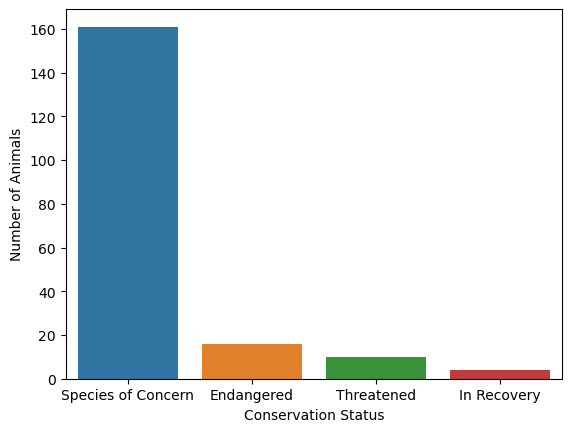

In [9]:
sns.countplot(x='conservation_status', data=species)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Animals')
plt.show()

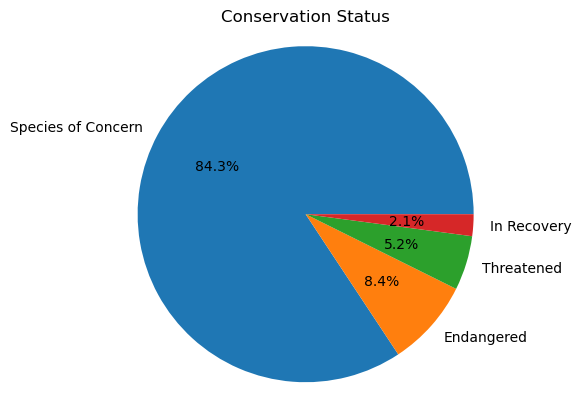

In [10]:
plt.pie(species.conservation_status.value_counts(), labels=species.conservation_status.value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Conservation Status')
plt.show()

In [11]:
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


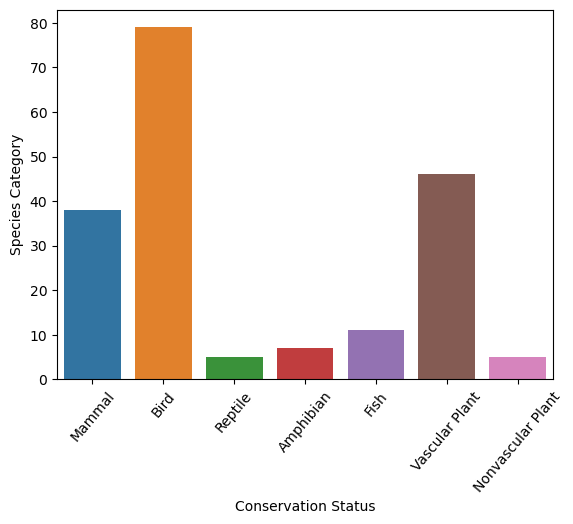

In [12]:
sns.countplot(x='category', data=species)
plt.xlabel('Conservation Status')
plt.ylabel('Species Category')
plt.xticks(rotation=50)
plt.show()

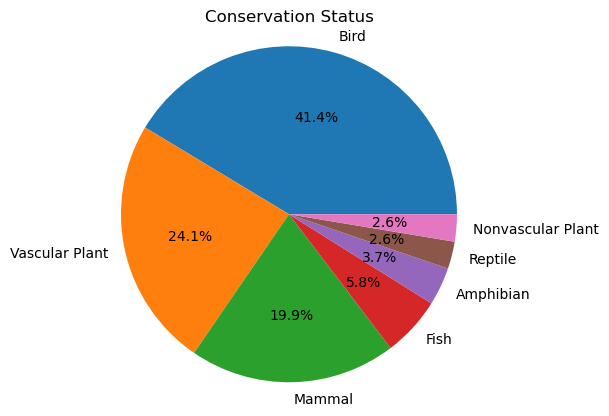

In [13]:
plt.pie(species.category.value_counts(), labels=species.category.value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Conservation Status')
plt.show()

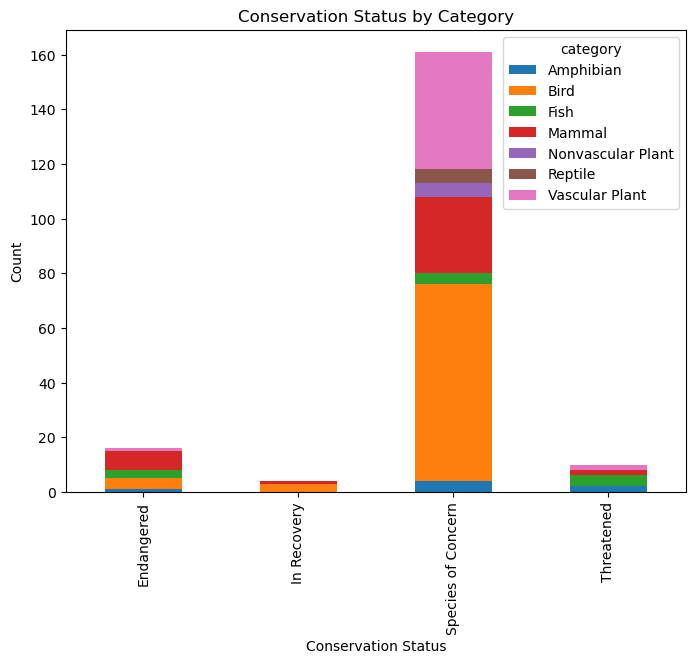

In [14]:
grouped_data = species.groupby(['conservation_status', 'category']).size()
conservationCategory = grouped_data.unstack(fill_value=0)
ax = conservationCategory.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_title('Conservation Status by Category')
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Count')
plt.show()

In [15]:
merged_data = pd.merge(species, observations, on='scientific_name', how='inner')
print(merged_data.head())

  category scientific_name common_names conservation_status  \
0   Mammal   Canis latrans       Coyote  Species of Concern   
1   Mammal   Canis latrans       Coyote  Species of Concern   
2   Mammal   Canis latrans       Coyote  Species of Concern   
3   Mammal   Canis latrans       Coyote  Species of Concern   
4   Mammal     Canis lupus    Gray Wolf          Endangered   

                             park_name  observations  
0                  Bryce National Park            85  
1            Yellowstone National Park           206  
2  Great Smoky Mountains National Park            68  
3               Yosemite National Park            99  
4               Yosemite National Park            35  


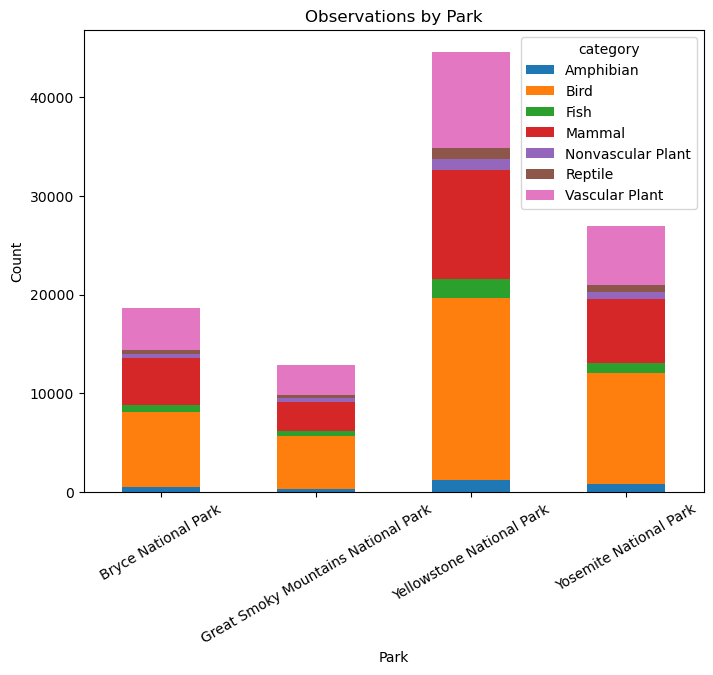

In [17]:
grouped_merge = merged_data.groupby(['park_name', 'category'])['observations'].sum()
observationCategory = grouped_merge.unstack(fill_value=0)
ax = observationCategory.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_title('Observations by Park')
ax.set_xlabel('Park')
ax.set_ylabel('Count')
plt.xticks(rotation=30)
plt.show()